<a href="https://colab.research.google.com/github/RyoNaruse/aiuaiu/blob/master/usdjpy_ma_reversecross_filtered_ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import functools
import os
import datetime
from google.colab import drive
drive.mount('/content/drive')
# 4/uwHxO9fnnxZTbEWs4WkmSTxHrnc5Z8Z-HiR2CzLkccD4kt_GA-AYg4Y
#naru ryoのをマウント





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
!dir ./drive/My\ Drive/Colab\ Notebooks
# USDJPY5200052019.csv

2020-02-0101.57.31heartbeat.csv
5m_bolinger_break_nofiltered.csv
5m_eurusd_hl30_break_1hkudari10_uhehe_break_buy_rule1.csv
5m_hl10_break_1hkudari_uhehe_break_buy_rule1.csv
5m_hl10_break_1hnobori_sitahe_break_sell_rule1.csv
5m_hl_break_1hkudari_uhehe_break_buy_rule3.csv
5m_hl_break_1hnobori_sitahe_break_sell_rule3.csv
5m_ma12_ma24_result2015.csv
5m_ma12_ma24_result.csv
5m_minmax5_break_buy_filtered_2.csv
5m_minmax5_break_buy_flitered_1.csv
5m_minmax5_break_even.csv
5m_minmax5_break_prof.csv
Aistidies_mnist.ipynb
bb20_break_1hkudari_uhehe_break_sell_rule1.csv
bb20_break_1hnobori_sitahe_break_sell_rule1.csv
EURUSD20052019_1d.csv
EURUSD20052019_1h.csv
EURUSD20052019_5m.csv
fxusdjpy5mma
game(1).ipynb\ のコピー
hl5_break_1hnobori_sitahe_break_sell_rule3.csv
kaggle.ipynb
losscutatr
test.ipynbest
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
USDJPY1d20052019.csv
USDJPY1h20052019.csv
USDJPY5200052019.csv
USDJPY52018.csv
USDJPYML2
USDJPYML3
USDJPYML4
USDJPYML.ipynb
WaveAnalitics


In [ ]:
#たたき台
def get_filtered_result3(shortv, longv, filterv, atr_constv, tr_periodv, parameter=None):

    # if parameter != None:
        # filepath = './drive/My Drive/Colab Notebooks/losscutatr/' + parameter + str(atr_constv) + '.csv'
        # filename = 'stoploss_' + parameter + str(atr_constv) + '.png'
        # filepath = './drive/My Drive/Colab Notebooks/losscutatr/' + filename

    short = shortv
    long = longv
    filter_mado = filterv
    atr_const = atr_constv
    tr_period = tr_periodv
    variable_value = str(atr_constv)
   
    df_5m['ma_short'] = pd.DataFrame(df_5m['close'].rolling(short).mean())
    df_5m['ma_long'] = pd.DataFrame(df_5m['close'].rolling(long).mean())


    df_5m['direction'] = '↑'
    df_5m['sign'] = ''

    #MAクロスのサインを記録
    for i in range(6, len(df_5m)):
      if df_5m.iat[i-1,5] > df_5m.iat[i-1,6]:
        df_5m.iat[i,7] = '↑'
      elif df_5m.iat[i-1,5] < df_5m.iat[i-1,6]:
        df_5m.iat[i,7] = '↓'
      else:
        df_5m.iat[i,7] = str(df_5m.iat[i-1,7])

    #hl用サイン記入
    for i in range(2,len(df_5m)):
      if df_5m.iat[i-1,7] == '↓' and df_5m.iat[i,7] == '↑':
        df_5m.iat[i,8] = '買'
      elif df_5m.iat[i-1,7] == '↑' and df_5m.iat[i,7] == '↓':
        df_5m.iat[i,8] = '売'


    # def get_judge(x):
    #   if x[0] != '':
    #       if (x[0] == '買' and x[1]  >= 0) or (x[0] == '売' and x[1] < 0):
    #           #終値のフィルターMAに対する方向　と　IN方向が同じとき
    #           return 1
    #       else:
    #           return 0

    df_5m['filter_ma'] = df_5m['close'] - df_5m['close'].rolling(filter_mado).mean()
    df_5m['judge'] = 0
    
    for i in range(2,len(df_5m)):
        if (df_5m.iat[i,8] == '買' and df_5m.iat[i-1,9] >= 0) or (df_5m.iat[i,8] == '売' and df_5m.iat[i-1,9] < 0):
            df_5m.iat[i,10] = 1
        else:
            df_5m.iat[i,10] = 0
    # df_5m['judge'] = df_5m[['sign','filter_ma']].apply(get_judge,axis=1)

    df_5m['loss_cut'] = 0

    df = df_5m.copy()
    timing = []
    buysell = []
    in_price = []
    max_loss = []
    max_profit = []
    profit = []
    judges = []
    loss_cut_line = []
    in_row = 0
    out_row = 0
    has_position = False

    print(len(df))
    df_trade_results = pd.DataFrame([], columns=['date', 'direction', 'price'])

    for i in range(len(df)):


        if has_position:

            out_row = i
            
            max_price = df.iloc[in_row:out_row,2].max()
            min_price = df.iloc[in_row:out_row,3].min()

              
            if true_range is None:
                approval_loss = -1000
            else:
                approval_loss = - true_range * atr_const
                if approval_loss > -0.001:
                    approval_loss = -0.001


            if buysell[-1] == '買':

                  if approval_loss > min_price - df.iat[in_row,1]:

                      max_loss.append(approval_loss)
                      max_profit.append(max_price - df.iat[in_row,1])
                      profit.append(approval_loss)

                      has_position = False

            if buysell[-1] == '売':

                  if approval_loss > df.iat[in_row,1] - max_price:

                      max_loss.append(approval_loss)
                      max_profit.append(df.iat[in_row,1] - min_price)
                      profit.append(approval_loss)

                      has_position = False
                

        if df.iat[i,8] != '':

            if has_position:

                out_row = i

                max_price = df.iloc[in_row:out_row,2].max()
                min_price = df.iloc[in_row:out_row,3].min()

                if buysell[-1] == '買':
                      max_loss.append(min_price - df.iat[in_row,1])
                      max_profit.append(max_price - df.iat[in_row,1])
                      profit.append(df.iat[out_row,1] - df.iat[in_row,1])
            
                if buysell[-1] == '売':
                      max_loss.append(df.iat[in_row,1] - max_price)
                      max_profit.append(df.iat[in_row,1] - min_price)
                      profit.append(df.iat[in_row,1] - df.iat[out_row,1])
                
                has_position = False
      
        if df.iat[i,8] != '' and has_position == False:

            in_row = i
            
            timing.append(df.iat[in_row,0])
            buysell.append(df.iat[in_row,8])
            in_price.append(df.iat[in_row,1])
            judges.append(df.iat[in_row,10])

            # true_range = 100 * (df.iloc[in_row - tr_period:in_row,2].max() - df.iloc[in_row-tr_period:in_row,3].min()) / df_5m.iat[in_row,1]
            true_range = (df.iloc[in_row - tr_period:in_row,2].max() - df.iloc[in_row-tr_period:in_row,3].min())
          
            has_position = True
          
        if i % 100000 == 0:
          print(str(i) + 'まで終了')
        #10万進むのに15秒くらい
        # if len(timing) > 0:
        #     assert  len(timing) != len(profit), 'err in {}'.format(i)

    if len(timing) != len(max_loss):

        timing.pop(-1)
        buysell.pop(-1)
        in_price.pop(-1)
        judges.pop(-1)

    print('approval loss は' + str(approval_loss))

    df_trade_results = pd.DataFrame(data={'date':timing, 'direction':buysell, 'price':in_price, 'max_loss':max_loss, 'max_profit':max_profit, 'profit':profit, 'judge':judges},\
                                columns=['date','direction','price','max_loss','max_profit', 'profit','judge'])


    df0 = df_trade_results[df_trade_results['judge'] == 0].copy()
    df1 = df_trade_results[df_trade_results['judge'] == 1].copy()

    dfs = [df0,df1]

    for dfsep in dfs:
        dfsep['ruiseki'] = 0.0
        for i in range(1,len(dfsep)):
            dfsep.iat[i,7] = dfsep.iat[i,5] + dfsep.iat[i-1,7]
    if parameter == None:
            dfsep['ruiseki'].plot()

    print('judge0は' + str(len(df0)) +'回')
    print('利益' + str(df0.iat[-1,7]))
    print('judge1は' + str(len(df1)) +'回')
    print('利益' + str(df1.iat[-1,7]))

    if parameter != None:
        # df.to_csv(filepath, header=True)
        #ルールを文字列で
        rule = 'usdjpy_ma' + str(short) + '_ma' + str(long) + '_cross_' + 'filter' + str(filter_mado) + '_tr_period' + str(tr_period) + '_stoploss_' + str(parameter)
        #htmlファイルのフォルダパス
        html_file_path = r'C:\Users\Ryo Naruse\Desktop\fushiginakimoti\markets\fx\trade_methods\comparison\loss_cut'
        #画像のフォルダパスはhtmlファイルのパスから生成する
        imgfolderpath = html_file_path + '\\img' + '\\' + rule
        # imgfolderpath = './drive/My Drive/Colab Notebooks/losscutatr/' + rule
        if not os.path.exists(imgfolderpath):
            os.mkdir(imgfolderpath)
        imgname = rule + str(atr_const) + '.png'
        homepage_image_src = 'img/' + rule + '/' + imgname
        print(rule)
        print(imgfolderpath)
        print(imgname)
        print(homepage_image_src)

        df_img = df1.copy()
        indices = df1.index
        cumsums = df1['ruiseki']

        number_of_trades = len(df_img)
        win_rate = round(100 * len(df_img[df_img['profit']>0]) / number_of_trades, 1)
        profit = round(df_img.iat[-1,7],4)
        imgs_information = pd.DataFrame([{'rule':rule,'variable':parameter,'variable_value':variable_value,'html_file_path':html_file_path,\
                                          'img_folder_path':imgfolderpath,'img_name':imgname,'homepage_image_src':homepage_image_src,\
                                          'number_of_trades':number_of_trades,'win_rate':win_rate,'profit':profit}])
   
        imgs_information.to_csv(imgfolderpath + '\\' + rule + '\\' + 'imgs_information.csv',header=False, index=False,mode='a')

        fig = None
        fig = plt.figure(figsize=(5.0,3.5), dpi=100, facecolor='w',linewidth=1, edgecolor='black', tight_layout=True)
        plt.plot(indices, cumsums)
        plt.title('stop loss HL(' + str(tr_period) + ')×' + str(atr_constv))
        plt.xlabel('number of trades')
        plt.ylabel('cumsums')
        plt.grid(b=None, which='major', axis='both')
        plt.show
        fig.savefig(imgfolderpath + '\\' +imgname)
        # fig.savefig(imgfolderpath + '/' +imgname)
    ######HTMLにグラフを入れていく部分#############################################
    ######この範囲を繰り返して結果のグラフと成績を表示$$$$$$$$$$$$$$$$$$$$
    
#  get_filtered_result3(shortv, longv, filterv, atr_constv, tr_periodv, parameter=None):
# somefunc3 = functools.partial(get_filtered_result3, shortv=12, longv=24, filterv=288)
# somefunc3 = functools.partial(get_filtered_result3, shortv=12, longv=24, atr_constv=1, tr_periodv=10)

#ヒストリカルデータのパス設定と、
#htmlファイルのパス設定、ルール編集、画像のタイトルを設定してから行うこと。
#管理者としてプロンプトを実行する
start_time = datetime.datetime.now()
print('start at' + str(start_time))

df_5m = pd.read_csv(r'C:\Users\Ryo Naruse\Desktop\fushiginakimoti/USDJPY5200052019.csv',sep=',',header=None)
df_5m.drop(6, axis=1)
df_5m[6] = pd.to_datetime(df_5m[[0,1]].apply(lambda x: '{} {}'.format(x[0], x[1]),axis=1))
df_5m = df_5m[[6,2,3,4,5]]
df_5m = df_5m.rename(columns={6: 'date', 2:'open', 3:'high', 4:'low', 5:'close',7:'max5', 8:'min5', 9:'direction'})

lap_time = datetime.datetime.now()
print('generate_imgs_started')
somefunc3 = functools.partial(get_filtered_result3, shortv=12, longv=24, filterv=240, tr_periodv=10, parameter='atr_const')

variables = [1000,5,3,2,1.5,1,0.75,0.5,0.3,0.1]
for var in variables:
    somefunc3(atr_constv=var)
    if var == variables[0]:
        end_time = datetime.datetime.now()
        print('終了予定時刻：'+ str(lap_time + (end_time - lap_time) * (len(variables)-1)))

In [22]:
#短期に逆、長期に順バリ

def get_filtered_result3(shortv, longv, filterv, parameter=None, do_output=False):

    # if parameter != None:
        # filepath = './drive/My Drive/Colab Notebooks/losscutatr/' + parameter + str(atr_constv) + '.csv'
        # filename = 'stoploss_' + parameter + str(atr_constv) + '.png'
        # filepath = './drive/My Drive/Colab Notebooks/losscutatr/' + filename

    shortma = 12
    longma = 24
    filter_mado = filterv
    # tr_period = tr_periodv
    # atr_const = atr_constv
    # variable_value = str(atr_constv)

    df_5m['ma_short'] = pd.DataFrame(df_5m['close'].rolling(shortma).mean()) #5
    df_5m['ma_long'] = pd.DataFrame(df_5m['close'].rolling(longma).mean())   #6


    df_5m['direction'] = '↑'   #7
    df_5m['sign'] = ''
    df_5m['filter_ma'] = df_5m['ma_long'] - df_5m['close'].rolling(filter_mado).mean()  #9
    df_5m['judge'] = 0

    #MAクロスのサインを記録 売買アルゴリズムのキモ
    for i in range(0, len(df_5m)):
      if df_5m.iat[i-1,5] > df_5m.iat[i-1,6] and df_5m.iat[i-1,9] <= 0 and df_5m.iat[i-1,7] == '↑':
        df_5m.iat[i,7] = '↓'
      elif df_5m.iat[i-1,5] < df_5m.iat[i-1,6] and df_5m.iat[i-1,9] >= 0 and df_5m.iat[i-1,7] == '↓':
        df_5m.iat[i,7] = '↑'
      else:
        df_5m.iat[i,7] = str(df_5m.iat[i-1,7])

    #hl用サイン記入
    for i in range(0,len(df_5m)):
      if df_5m.iat[i-1,7] == '↓' and df_5m.iat[i,7] == '↑':
        df_5m.iat[i,8] = '買'
      elif df_5m.iat[i-1,7] == '↑' and df_5m.iat[i,7] == '↓':
        df_5m.iat[i,8] = '売'


    # def get_judge(x):
    #   if x[0] != '':
    #       if (x[0] == '買' and x[1]  >= 0) or (x[0] == '売' and x[1] < 0):
    #           #終値のフィルターMAに対する方向　と　IN方向が同じとき
    #           return 1
    #       else:
    #           return 0


    #フィルタがけなどでジャッジが必要な場合はここを使う
    # for i in range(2,len(df_5m)):
    #     if (df_5m.iat[i,8] == '買' and df_5m.iat[i-1,9] >= 0) or (df_5m.iat[i,8] == '売' and df_5m.iat[i-1,9] <= 0):
    #         df_5m.iat[i,10] = 1
    #     else:
    #         df_5m.iat[i,10] = 0
    # df_5m['judge'] = df_5m[['sign','filter_ma']].apply(get_judge,axis=1)

    df_5m['loss_cut'] = 0

    df = df_5m.copy()
    timing = []
    buysell = []
    in_price = []
    max_loss = []
    max_profit = []
    profit = []
    judges = []
    loss_cut_line = []
    in_row = 0
    out_row = 0
    has_position = False

    print(len(df))
    df_trade_results = pd.DataFrame([], columns=['date', 'direction', 'price'])

    for i in range(len(df)):

        sign = df.iat[i,8]
        filtering_position = df.iat[i-1,9]


        #ここは損切り判定ブロック
        if has_position:

            out_row = i
            
            max_price = df.iloc[in_row:out_row,2].max()
            min_price = df.iloc[in_row:out_row,3].min()

            approval_loss = -1000
            # if true_range is None:
            #     approval_loss = -1000
            # else:
            #     approval_loss = - true_range * atr_const
            #     if approval_loss > -0.001:
            #         approval_loss = -0.001


            if buysell[-1] == '買':

                  if approval_loss > min_price - df.iat[in_row,1]:

                      max_loss.append(approval_loss)
                      max_profit.append(max_price - df.iat[in_row,1])
                      profit.append(approval_loss)

                      has_position = False

            if buysell[-1] == '売':

                  if approval_loss > df.iat[in_row,1] - max_price:

                      max_loss.append(approval_loss)
                      max_profit.append(df.iat[in_row,1] - min_price)
                      profit.append(approval_loss)

                      has_position = False
                

        if sign != '':

            if has_position:

                out_row = i

                max_price = df.iloc[in_row:out_row,2].max()
                min_price = df.iloc[in_row:out_row,3].min()

                if buysell[-1] == '買':
                      max_loss.append(min_price - df.iat[in_row,1])
                      max_profit.append(max_price - df.iat[in_row,1])
                      profit.append(df.iat[out_row,1] - df.iat[in_row,1])
                      has_position = False
            
                elif buysell[-1] == '売':
                      max_loss.append(df.iat[in_row,1] - max_price)
                      max_profit.append(df.iat[in_row,1] - min_price)
                      profit.append(df.iat[in_row,1] - df.iat[out_row,1])
                      has_position = False
                else:
                  raise Valuerror('buysellに変な値が入ってる')
                
      

        if sign != '' and has_position == False:

            in_row = i
            
            timing.append(df.iat[in_row,0])
            buysell.append(df.iat[in_row,8])
            in_price.append(df.iat[in_row,1])
            judges.append(df.iat[in_row,10])

            
            # true_range = (df.iloc[in_row - tr_period:in_row,2].max() - df.iloc[in_row-tr_period:in_row,3].min())
          
            has_position = True
          
        if i % 100000 == 0:
          print(str(i) + 'まで終了')
        #10万進むのに15秒くらい
        # if len(timing) > 0:
        #     assert  len(timing) != len(profit), 'err in {}'.format(i)

    if len(timing) != len(max_loss):

        timing.pop(-1)
        buysell.pop(-1)
        in_price.pop(-1)
        judges.pop(-1)

    # print(len(timing))
    # print(len(buysell))
    # print(len(in_price))
    # print(len(max_loss))
    # print(len(max_profit))
    # print(len(profit))
    # print(len(judges))
    assert  len(timing)== len(profit), 'err 仕掛け数と結果数が合わない'


    print('approval loss は' + str(approval_loss))

    df_trade_results = pd.DataFrame(data={'date':timing, 'direction':buysell, 'price':in_price, 'max_loss':max_loss, 'max_profit':max_profit, 'profit':profit, 'judge':judges},\
                                columns=['date','direction','price','max_loss','max_profit', 'profit','judge'])

    # print(df_trade_results.head())

    # df0 = df_trade_results[df_trade_results['judge'] == 0].copy()
    # df1 = df_trade_results[df_trade_results['judge'] == 1].copy()

    # dfs = [df0,df1]
    dfs = [df_trade_results]

    for dfsep in dfs:
        dfsep['ruiseki'] = 0.0
        for i in range(1,len(dfsep)):
            dfsep.iat[i,7] = dfsep.iat[i,5] + dfsep.iat[i-1,7]

        if do_output == False:
            dfsep['ruiseki'].plot()

    # print('judge0は' + str(len(df0)) +'回')
    # print('利益' + str(df0.iat[-1,7]))
    # print('judge1は' + str(len(df1)) +'回')
    # print('利益' + str(df1.iat[-1,7]))
    print('df_trade_resultsは' + str(len(df_trade_results)) +'回')
    print('利益' + str(df_trade_results.iat[-1,7]))

    df_img = df_trade_results.copy()
    indices = df_img.index
    cumsums = df_img['ruiseki']

    if do_output == True:
        # df.to_csv(filepath, header=True)
        #ルールを文字列で
        rule = 'usdjpy_ma' + str(shortma) + '_ma' + str(longma) + '_cross_' + 'filter' + str(filter_mado) + '_variable_' + str(parameter)
        #htmlファイルのフォルダパス
        html_file_path = r'C:\Users\Ryo Naruse\Desktop\fushiginakimoti\markets\fx\trade_methods\comparison\loss_cut'
        #画像のフォルダパスはhtmlファイルのパスから生成する
        imgfolderpath = html_file_path + '\\img' + '\\' + rule
        # imgfolderpath = './drive/My Drive/Colab Notebooks/losscutatr/' + rule
        if not os.path.exists(imgfolderpath):
            os.mkdir(imgfolderpath)
        imgname = rule + str(atr_const) + '.png'
        homepage_image_src = 'img/' + rule + '/' + imgname
        print(rule)
        print(imgfolderpath)
        print(imgname)
        print(homepage_image_src)

        number_of_trades = len(df_img)
        win_rate = round(100 * len(df_img[df_img['profit']>0]) / number_of_trades, 1)
        profit = round(df_img.iat[-1,7],4)
        imgs_information = pd.DataFrame([{'rule':rule,'variable':parameter,'variable_value':variable_value,'html_file_path':html_file_path,\
                                          'img_folder_path':imgfolderpath,'img_name':imgname,'homepage_image_src':homepage_image_src,\
                                          'number_of_trades':number_of_trades,'win_rate':win_rate,'profit':profit}])

        imgs_information.to_csv(imgfolderpath + '\\' + rule + '\\' + 'imgs_information.csv',header=False, index=False,mode='a')

        fig = None
        fig = plt.figure(figsize=(5.0,3.5), dpi=100, facecolor='w',linewidth=1, edgecolor='black', tight_layout=True)
        plt.plot(indices, cumsums)
        plt.title('stop loss HL(' + str(tr_period) + ')×' + str(atr_constv))
        plt.xlabel('number of trades')
        plt.ylabel('cumsums')
        plt.grid(b=None, which='major', axis='both')
        plt.show
        fig.savefig(imgfolderpath + '\\' +imgname)
        # fig.savefig(imgfolderpath + '/' +imgname)
        fig.savefig(imgfolderpath + '\\' +imgname)
        # fig.savefig(imgfolderpath + '/' +imgname)
    


In [21]:
def get_filtered_result4(shortv, longv, filterv, parameter=None, do_output=False):

    # if parameter != None:
        # filepath = './drive/My Drive/Colab Notebooks/losscutatr/' + parameter + str(atr_constv) + '.csv'
        # filename = 'stoploss_' + parameter + str(atr_constv) + '.png'
        # filepath = './drive/My Drive/Colab Notebooks/losscutatr/' + filename

    shortma = 12
    longma = 24
    filter_mado = filterv
    # tr_period = tr_periodv
    # atr_const = atr_constv
    # variable_value = str(atr_constv)

    df_5m['ma_short'] = pd.DataFrame(df_5m['close'].rolling(shortma).mean()) #5
    df_5m['ma_long'] = pd.DataFrame(df_5m['close'].rolling(longma).mean())   #6


    df_5m['direction'] = '↑'   #7
    df_5m['sign'] = ''
    df_5m['filter_ma'] = df_5m['ma_long'] - df_5m['close'].rolling(filter_mado).mean()  #9
    df_5m['judge'] = 0

    #MAクロスのサインを記録 売買アルゴリズムのキモ
    for i in range(0, len(df_5m)):
      if df_5m.iat[i-1,5] > df_5m.iat[i-1,6] and df_5m.iat[i-1,9] <= 0 and df_5m.iat[i-1,7] == '↑':
        df_5m.iat[i,7] = '↓'
      elif df_5m.iat[i-1,5] < df_5m.iat[i-1,6] and df_5m.iat[i-1,9] >= 0 and df_5m.iat[i-1,7] == '↓':
        df_5m.iat[i,7] = '↑'
      else:
        df_5m.iat[i,7] = str(df_5m.iat[i-1,7])

    #hl用サイン記入
    for i in range(0,len(df_5m)):
      if df_5m.iat[i-1,7] == '↓' and df_5m.iat[i,7] == '↑':
        df_5m.iat[i,8] = '買'
      elif df_5m.iat[i-1,7] == '↑' and df_5m.iat[i,7] == '↓':
        df_5m.iat[i,8] = '売'


    # def get_judge(x):
    #   if x[0] != '':
    #       if (x[0] == '買' and x[1]  >= 0) or (x[0] == '売' and x[1] < 0):
    #           #終値のフィルターMAに対する方向　と　IN方向が同じとき
    #           return 1
    #       else:
    #           return 0


    #フィルタがけなどでジャッジが必要な場合はここを使う
    # for i in range(2,len(df_5m)):
    #     if (df_5m.iat[i,8] == '買' and df_5m.iat[i-1,9] >= 0) or (df_5m.iat[i,8] == '売' and df_5m.iat[i-1,9] <= 0):
    #         df_5m.iat[i,10] = 1
    #     else:
    #         df_5m.iat[i,10] = 0
    # df_5m['judge'] = df_5m[['sign','filter_ma']].apply(get_judge,axis=1)

    df_5m['loss_cut'] = 0

    df = df_5m.copy()
    timing = []
    buysell = []
    in_price = []
    max_loss = []
    max_profit = []
    profit = []
    judges = []
    loss_cut_line = []
    in_row = 0
    out_row = 0
    has_position = False

    print(len(df))
    df_trade_results = pd.DataFrame([], columns=['date', 'direction', 'price'])

    for i in range(len(df)):

        sign = df.iat[i,8]


        #ここは損切り判定ブロック
        if has_position:

            out_row = i
            
            max_price = df.iloc[in_row:out_row,2].max()
            min_price = df.iloc[in_row:out_row,3].min()

            approval_loss = -1000
            # if true_range is None:
            #     approval_loss = -1000
            # else:
            #     approval_loss = - true_range * atr_const
            #     if approval_loss > -0.001:
            #         approval_loss = -0.001


            if buysell[-1] == '買':

                  if approval_loss > min_price - df.iat[in_row,1]:

                      max_loss.append(approval_loss)
                      max_profit.append(max_price - df.iat[in_row,1])
                      profit.append(approval_loss)

                      has_position = False

            if buysell[-1] == '売':

                  if approval_loss > df.iat[in_row,1] - max_price:

                      max_loss.append(approval_loss)
                      max_profit.append(df.iat[in_row,1] - min_price)
                      profit.append(approval_loss)

                      has_position = False
                

        if sign != '':

            if has_position:

                filtering_position = df.iat[i-1,9]

                out_row = i

                max_price = df.iloc[in_row:out_row,2].max()
                min_price = df.iloc[in_row:out_row,3].min()

                if buysell[-1] == '買':
                      max_loss.append(min_price - df.iat[in_row,1])
                      max_profit.append(max_price - df.iat[in_row,1])
                      profit.append(df.iat[out_row,1] - df.iat[in_row,1])
                      has_position = False
            
                elif buysell[-1] == '売':
                      max_loss.append(df.iat[in_row,1] - max_price)
                      max_profit.append(df.iat[in_row,1] - min_price)
                      profit.append(df.iat[in_row,1] - df.iat[out_row,1])
                      has_position = False
                else:
                  raise Valuerror('buysellに変な値が入ってる')
                
      

        if sign != '' and has_position == False:

            in_row = i
            
            timing.append(df.iat[in_row,0])
            buysell.append(df.iat[in_row,8])
            in_price.append(df.iat[in_row,1])
            judges.append(df.iat[in_row,10])

            
            # true_range = (df.iloc[in_row - tr_period:in_row,2].max() - df.iloc[in_row-tr_period:in_row,3].min())
          
            has_position = True
          
        if i % 100000 == 0:
          print(str(i) + 'まで終了')
        #10万進むのに15秒くらい
        # if len(timing) > 0:
        #     assert  len(timing) != len(profit), 'err in {}'.format(i)

    if len(timing) != len(max_loss):

        timing.pop(-1)
        buysell.pop(-1)
        in_price.pop(-1)
        judges.pop(-1)

    # print(len(timing))
    # print(len(buysell))
    # print(len(in_price))
    # print(len(max_loss))
    # print(len(max_profit))
    # print(len(profit))
    # print(len(judges))
    assert  len(timing)== len(profit), 'err 仕掛け数と結果数が合わない'


    print('approval loss は' + str(approval_loss))

    df_trade_results = pd.DataFrame(data={'date':timing, 'direction':buysell, 'price':in_price, 'max_loss':max_loss, 'max_profit':max_profit, 'profit':profit, 'judge':judges},\
                                columns=['date','direction','price','max_loss','max_profit', 'profit','judge'])

    # print(df_trade_results.head())

    # df0 = df_trade_results[df_trade_results['judge'] == 0].copy()
    # df1 = df_trade_results[df_trade_results['judge'] == 1].copy()

    # dfs = [df0,df1]
    dfs = [df_trade_results]

    for dfsep in dfs:
        dfsep['ruiseki'] = 0.0
        for i in range(1,len(dfsep)):
            dfsep.iat[i,7] = dfsep.iat[i,5] + dfsep.iat[i-1,7]

        if do_output == False:
            dfsep['ruiseki'].plot()

    # print('judge0は' + str(len(df0)) +'回')
    # print('利益' + str(df0.iat[-1,7]))
    # print('judge1は' + str(len(df1)) +'回')
    # print('利益' + str(df1.iat[-1,7]))
    print('df_trade_resultsは' + str(len(df_trade_results)) +'回')
    print('利益' + str(df_trade_results.iat[-1,7]))

    df_img = df_trade_results.copy()
    indices = df_img.index
    cumsums = df_img['ruiseki']

    if do_output == True:
        # df.to_csv(filepath, header=True)
        #ルールを文字列で
        rule = 'usdjpy_ma' + str(shortma) + '_ma' + str(longma) + '_cross_' + '_variable_' + str(parameter)
        #htmlファイルのフォルダパス
        html_file_path = r'C:\Users\Ryo Naruse\Desktop\fushiginakimoti\markets\fx\trade_methods\comparison\loss_cut'
        #画像のフォルダパスはhtmlファイルのパスから生成する
        imgfolderpath = html_file_path + '\\img' + '\\' + rule
        # imgfolderpath = './drive/My Drive/Colab Notebooks/losscutatr/' + rule
        if not os.path.exists(imgfolderpath):
            os.mkdir(imgfolderpath)
        imgname = rule + str(filterv) + '.png'
        homepage_image_src = 'img/' + rule + '/' + imgname
        print(rule)
        print(imgfolderpath)
        print(imgname)
        print(homepage_image_src)

        number_of_trades = len(df_img)
        win_rate = round(100 * len(df_img[df_img['profit']>0]) / number_of_trades, 1)
        profit = round(df_img.iat[-1,7],4)
        imgs_information = pd.DataFrame([{'rule':rule,'variable':parameter,'variable_value':variable_value,'html_file_path':html_file_path,\
                                          'img_folder_path':imgfolderpath,'img_name':imgname,'homepage_image_src':homepage_image_src,\
                                          'number_of_trades':number_of_trades,'win_rate':win_rate,'profit':profit}])

        imgs_information.to_csv(imgfolderpath + '\\' + 'imgs_information.csv',header=False, index=False,mode='a')

        fig = None
        fig = plt.figure(figsize=(5.0,3.5), dpi=100, facecolor='w',linewidth=1, edgecolor='black', tight_layout=True)
        plt.plot(indices, cumsums)
        plt.title('ma12-ma24 cross filter ma' + str(filterv))
        plt.xlabel('number of trades')
        plt.ylabel('cumsums')
        plt.grid(b=None, which='major', axis='both')
        plt.show
        fig.savefig(imgfolderpath + '\\' +imgname)
        # fig.savefig(imgfolderpath + '/' +imgname)
        # fig.savefig(imgfolderpath + '\\' +imgname)
        # fig.savefig(imgfolderpath + '/' +imgname)




In [11]:
#ヒストリカルデータのパス設定と、
#htmlファイルのパス設定、ルール編集、画像のタイトルを設定してから行うこと。
#管理者としてプロンプトを実行する
start_time = datetime.datetime.now()
print('start at' + str(start_time))

# df_5m = pd.read_csv(r'C:\Users\Ryo Naruse\Desktop\fushiginakimoti/USDJPY5200052019.csv',sep=',',header=None)
df_5m = pd.read_csv('./drive/My Drive/Colab Notebooks/USDJPY5200052019.csv',sep=',',header=None)
df_5m.drop(6, axis=1)
df_5m[6] = pd.to_datetime(df_5m[[0,1]].apply(lambda x: '{} {}'.format(x[0], x[1]),axis=1))
df_5m = df_5m[[6,2,3,4,5]]
df_5m = df_5m.rename(columns={6: 'date', 2:'open', 3:'high', 4:'low', 5:'close',7:'max5', 8:'min5', 9:'direction'})

lap_time = datetime.datetime.now()
print('generate_imgs_started')
# somefunc3 = functools.partial(get_filtered_result3, shortv=12, longv=24, filterv=240, tr_periodv=10, parameter='atr_const')
# somefunc3 = functools.partial(get_filtered_result3, shortv=12, longv=24)

# variables = [1000,5,3,2,1.5,1,0.75,0.5,0.3,0.1]
# for var in variables:
#     somefunc3(atr_constv=var)
#     if var == variables[0]:
#         end_time = datetime.datetime.now()
#         print('終了予定時刻：'+ str(lap_time + (end_time - lap_time) * (len(variables)-1)))

start at2020-07-29 09:30:58.842618
generate_imgs_started


1096838
0まで終了
100000まで終了
200000まで終了
300000まで終了
400000まで終了
500000まで終了
600000まで終了
700000まで終了
800000まで終了
900000まで終了
1000000まで終了
approval loss は-1000
df_trade_resultsは35855回
利益-2.9209999999991823
かかった時間：0:09:14.838466


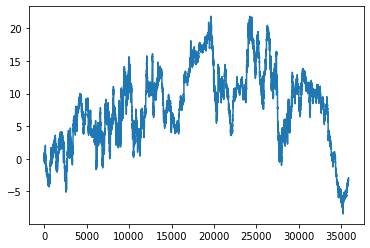

In [23]:
lap_time = datetime.datetime.now()
somefunc3(filterv=36)
end_time = datetime.datetime.now()
print('かかった時間：'+ str(end_time - lap_time))

1096838
0まで終了
100000まで終了
200000まで終了
300000まで終了
400000まで終了
500000まで終了
600000まで終了
700000まで終了
800000まで終了
900000まで終了
1000000まで終了
approval loss は-1000
df_trade_resultsは25627回
利益-10.87499999999882


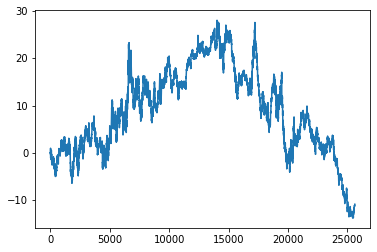

In [24]:
somefunc3(filterv=48)

1096838
0まで終了
100000まで終了
200000まで終了
300000まで終了
400000まで終了
500000まで終了
600000まで終了
700000まで終了
800000まで終了
900000まで終了
1000000まで終了
approval loss は-1000
df_trade_resultsは20725回
利益-4.653000000000887


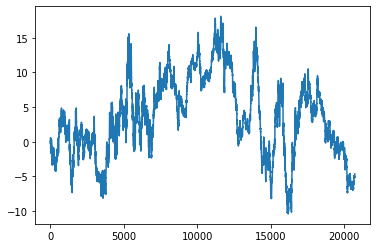

In [25]:
somefunc3(filterv=60)

1096838
0まで終了
100000まで終了
200000まで終了
300000まで終了
400000まで終了
500000まで終了
600000まで終了
700000まで終了
800000まで終了
900000まで終了
1000000まで終了
approval loss は-1000
df_trade_resultsは14773回
利益76.11700000000046


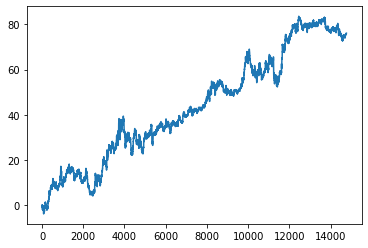

In [26]:
somefunc3(filterv=90)

1096838
0まで終了
100000まで終了
200000まで終了
300000まで終了
400000まで終了
500000まで終了
600000まで終了
700000まで終了
800000まで終了
900000まで終了
1000000まで終了
approval loss は-1000
df_trade_resultsは11893回
利益86.18299999999911


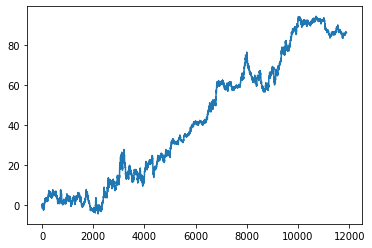

In [27]:
somefunc3(filterv=120)

1096838
0まで終了
1096838
0まで終了
100000まで終了
100000まで終了
200000まで終了
200000まで終了
300000まで終了
300000まで終了
400000まで終了
400000まで終了
500000まで終了
500000まで終了
600000まで終了
600000まで終了
700000まで終了
700000まで終了
800000まで終了
800000まで終了
900000まで終了
900000まで終了
1000000まで終了
1000000まで終了
approval loss は-1000
df_trade_resultsは9053回
利益90.4600000000004
approval loss は-1000
df_trade_resultsは9053回
利益90.4600000000004


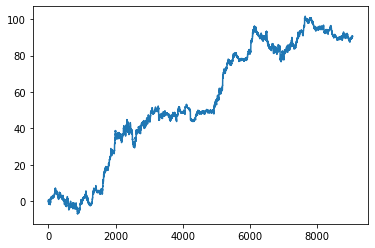

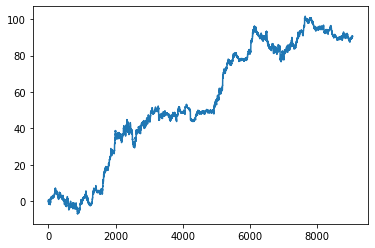

In [28]:
somefunc3(filterv=180)

1096838
0まで終了
100000まで終了
200000まで終了
300000まで終了
400000まで終了
500000まで終了
600000まで終了
700000まで終了
800000まで終了
900000まで終了
1000000まで終了
approval loss は-1000
df_trade_resultsは7377回
利益121.80400000000071


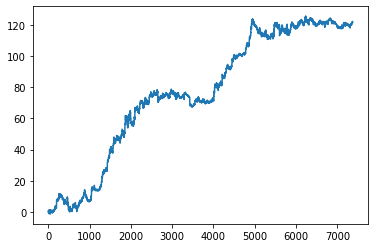

1096838
0まで終了
100000まで終了
200000まで終了
300000まで終了
400000まで終了
500000まで終了
600000まで終了
700000まで終了
800000まで終了
900000まで終了
1000000まで終了
approval loss は-1000
df_trade_resultsは7377回
利益121.80400000000071


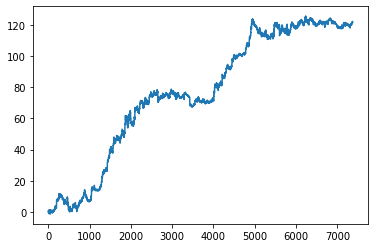

In [29]:
somefunc3(filterv=240)

1096838
0まで終了
100000まで終了
200000まで終了
300000まで終了
400000まで終了
500000まで終了
600000まで終了
700000まで終了
800000まで終了
900000まで終了
1000000まで終了
approval loss は-1000
df_trade_resultsは5835回
利益131.12999999999832


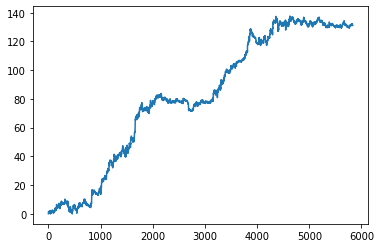

In [30]:
somefunc3(filterv=360)

1096838
0まで終了
100000まで終了
200000まで終了
300000まで終了
400000まで終了
500000まで終了
600000まで終了
700000まで終了
800000まで終了
900000まで終了
1000000まで終了
approval loss は-1000
df_trade_resultsは4913回
利益88.73099999999864


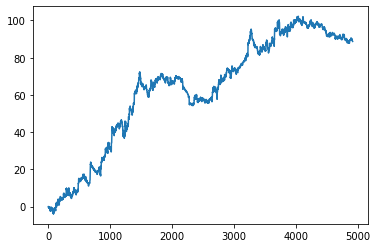

In [31]:
somefunc3(filterv=480)

1096838
0まで終了
100000まで終了
200000まで終了
300000まで終了
400000まで終了
500000まで終了
600000まで終了
700000まで終了
800000まで終了
900000まで終了
1000000まで終了
approval loss は-1000
df_trade_resultsは4375回
利益81.23499999999835


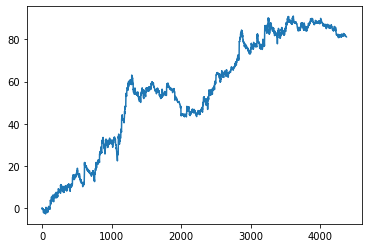

In [35]:
somefunc3(filterv=600)

In [33]:
df_5m.head(1)

,date,open,high,low,close,ma_short,ma_long,direction,sign,filter_ma,judge,loss_cut
0,2005-01-10 02:30:00,104.79,104.79,104.77,104.79,NaN,NaN,↑,,NaN,0,0


In [34]:
df_trade_results

,date,direction,price,max_loss,max_profit,profit,judge,ruiseki
0,2005-01-10 15:35:00,売,104.390,-0.110,0.600,0.380,0,0.000
1,2005-01-11 13:10:00,買,104.010,-0.180,0.020,-0.070,0,-0.070
2,2005-01-11 16:05:00,売,103.940,-0.100,0.850,0.560,0,0.490
3,2005-01-12 04:15:00,買,103.380,-0.190,0.140,0.000,0,0.490
4,2005-01-12 11:55:00,売,103.380,-0.130,0.100,0.060,0,0.550
...,...,...,...,...,...,...,...,...
11888,2019-12-24 14:00:00,売,109.389,-0.023,0.007,-0.002,0,86.421
11889,2019-12-24 16:15:00,買,109.391,-0.076,0.012,-0.020,0,86.401
11890,2019-12-24 19:00:00,売,109.371,-0.186,0.046,-0.169,0,86.232
11891,2019-12-26 11:00:00,買,109.540,-0.118,0.136,-0.054,0,86.178
